# Phase3 Project


##Business Understanding

SyriaTel, a TelecommunicationsCompany  is concerned about customer churn the phenomenon where customers stop using their services. Some long-term customers may generate lower revenue while still incurring service costs, potentially leading to revenue losses. Understanding the characteristics of customers who are likely to churn will help the company take preventive measures.


##Problem Statement

SyriaTel wants to predict customer churn using historical data. Additionally, they want to quantify the financial losses incurred by long-term customers who leave the service.

**Objectives**

1. Build a classification model to predict whether a customer will churn (binary classification: churn = True/False).

2. Identify key factors influencing customer churn.

3. Estimate the revenue lost due to customers who have been with the company for a long time but eventually leave.

4. Provide visual insights to support decision-making.


### Data Understanding

In [61]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [62]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
df.shape

(3333, 21)

**Data Cleaning**

In [ ]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [ ]:
df[df.duplicated()].count()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [64]:
df.drop(columns=['phone number'], inplace=True)

**EDA**

In [65]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


###Univariate Analysis

<ipython-input-6-8616f98a1d36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["churn"], palette=["green", "red"])


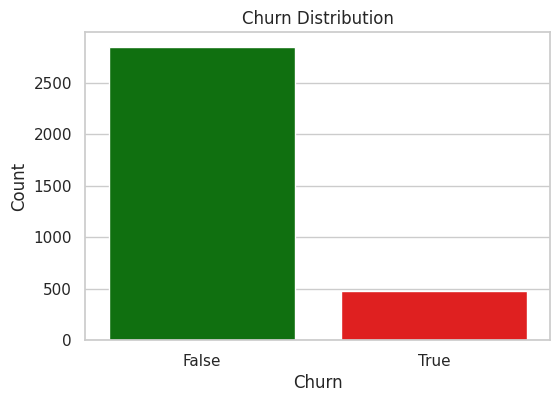

In [6]:
# Countplot of churn distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x=df["churn"], palette=["green", "red"])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()



observation

The majority of the customers do not churn indicating an imbalanced dataset.


###Bivariate Analysis

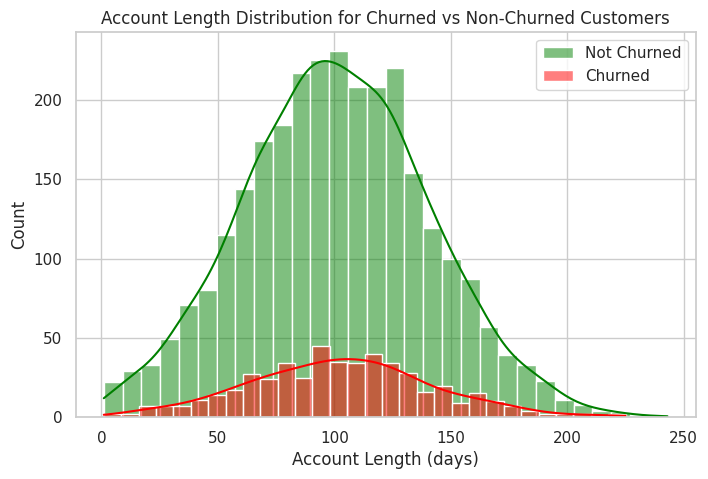

In [7]:
# Distribution of account length for churned vs non-churned customers
plt.figure(figsize=(8, 5))
sns.histplot(df[df["churn"] == False]["account length"], color="green", label="Not Churned", kde=True, bins=30)
sns.histplot(df[df["churn"] == True]["account length"], color="red", label="Churned", kde=True, bins=30)
plt.title("Account Length Distribution for Churned vs Non-Churned Customers")
plt.xlabel("Account Length (days)")
plt.ylabel("Count")
plt.legend()
plt.show()

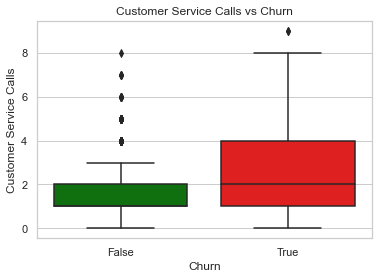

In [ ]:
# Boxplot of customer service calls for churn vs Customer Service calls
plt.figure(figsize=(6, 4))
sns.boxplot(x="churn", y="customer service calls", data=df, palette=["green", "red"])
plt.title("Customer Service Calls vs Churn")
plt.xlabel("Churn")
plt.ylabel("Customer Service Calls")
plt.show()

Observation

1.Both churn and non churned customers exist across various account lengths which shows that longer account lenngths result in churn.

2.Customers who churn tend to have made more customer service calls.


###Multivariate Analysis

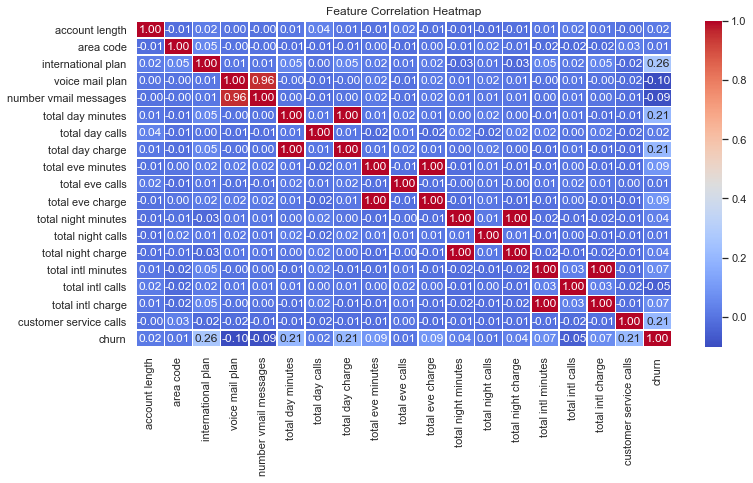

In [ ]:
#Heatmap for feature Correlation
#Encode to have numerical values only
df_encoded = df.copy()
df_encoded['churn'] = df['churn'].astype(int)
df_encoded = pd.get_dummies(df, columns=['state'], drop_first=True)
df_encoded['international plan'] = df['international plan'].map({'yes':1, 'no':0})
df_encoded['voice mail plan'] = df['voice mail plan'].map({'yes':1, 'no':0})
df_encoded.head()

# Generate heatmap
df_corr = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith("state_")])
plt.figure(figsize=(12, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

churn is highly correlated with customer service calls which indicates that Customers who makes more service calls are more likely to churn.

**Preprocessing**

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

### Encoding

In [66]:
df = pd.get_dummies(df, columns=['state'], drop_first=True)

In [67]:
df.head()
#df_encoded['churn'] = df['churn'].astype(int)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False


In [68]:
# Encode yes as 1 and no as 0
df['international plan'] = df['international plan'].map({'yes':1, 'no':0})
df['voice mail plan'] = df['voice mail plan'].map({'yes':1, 'no':0})
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False


In [69]:
for col in df_encoded.select_dtypes(include='bool'):
    df[col] = df[col].astype(int)
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False


In [70]:
# Define features (X) and target (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling**

In [71]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test = scaler.transform(X_test.select_dtypes(include=['number']))

## Modeling

## Classification

**Logistic Regression**

Logistic Regression Model Evaluation
Accuracy: 0.8561
Recall: 0.1683
Precision: 0.5862
F1-score: 0.2615

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.59      0.17      0.26       101

    accuracy                           0.86       667
   macro avg       0.73      0.57      0.59       667
weighted avg       0.83      0.86      0.82       667



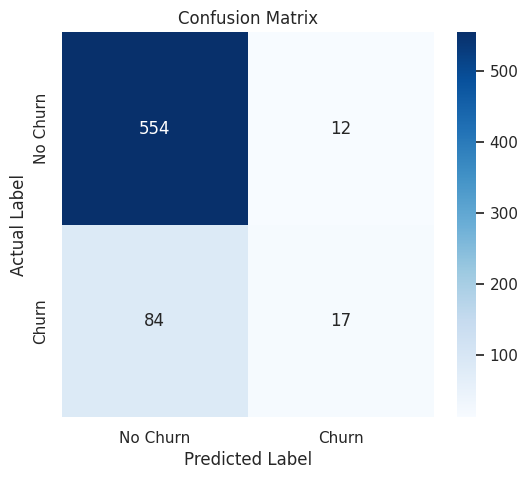

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Model Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

**Random Forest**


Random Forest Model Evaluation
Accuracy: 0.9490
Recall: 0.7129
Precision: 0.9351
F1-score: 0.8090

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.94      0.71      0.81       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



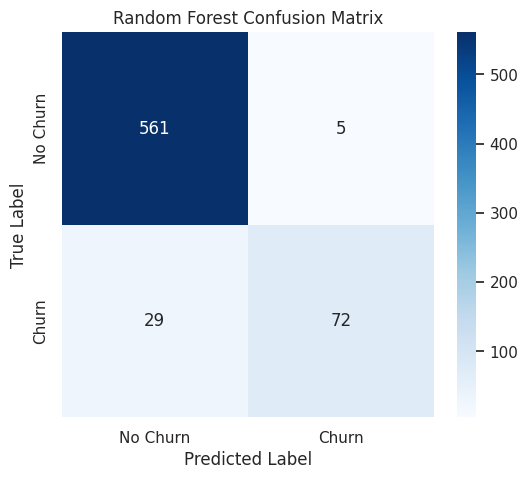

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

#Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest Model model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Model Evaluation")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

evaluate_model(y_test, y_pred_rf, "Random Forest")


**K-NN Model**

K-Nearest Neighbors (KNN) Model Evaluation
Accuracy: 0.8876
Recall: 0.3663
Precision: 0.7708
F1-score: 0.4966

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       566
           1       0.77      0.37      0.50       101

    accuracy                           0.89       667
   macro avg       0.83      0.67      0.72       667
weighted avg       0.88      0.89      0.87       667



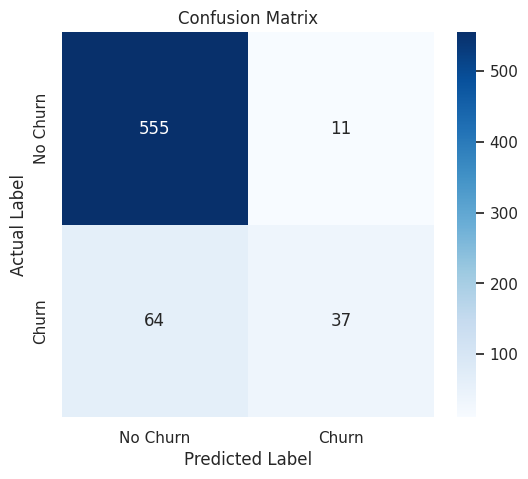

In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the K-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # Using 3 nearest neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("K-Nearest Neighbors (KNN) Model Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=['No Churn', 'Churn'],yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

**Decision Tree**

Decision Tree Model Evaluation
Accuracy: 0.9190
Recall: 0.7327
Precision: 0.7327
F1-score: 0.7327

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.73      0.73      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



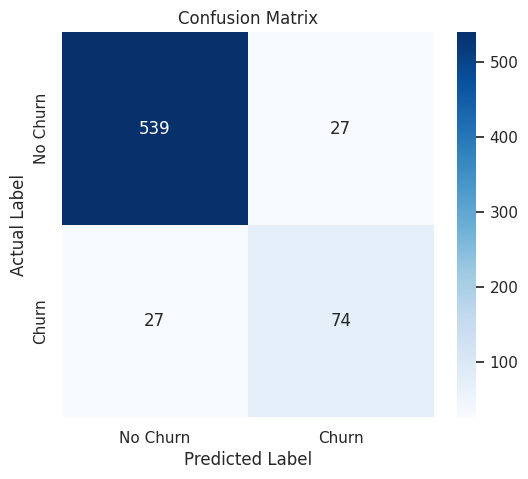

In [76]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Decision Tree Model Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

**SVM**


Support Vector Machine (SVM) Model Evaluation
Accuracy: 0.7796
Recall: 0.7921
Precision: 0.3883
F1-score: 0.5212

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       566
           1       0.39      0.79      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667



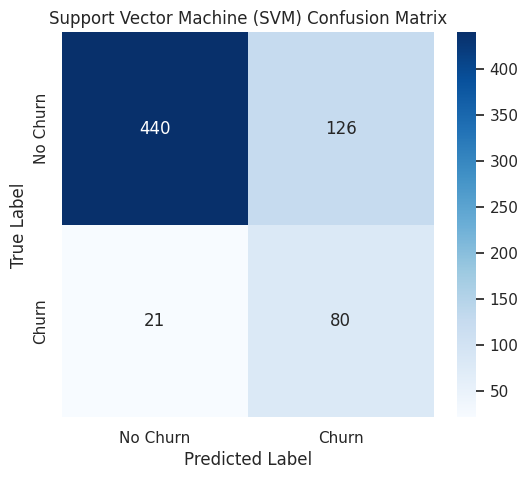

In [77]:
from sklearn.svm import SVC

# Train SVM with class balancing
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{model_name} Model Evaluation")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

evaluate_model(y_test, y_pred_svm, "Support Vector Machine (SVM)")


The best Model is Decision Tree because it had accuracy=94% and precision of 96% better than all the other models in terms of accuracy but recall are all the same with 74% in each model.

**Hyperparameter tuning**

###Tuned Random Forest

Tuned Random Forest - Accuracy: 0.9490254872563718
Tuned   Random Forest - Recall: 0.7029702970297029
Tuned Random Forest - Precision: 0.9466666666666667
Tuned Random Forest - F1-score: 0.8068181818181818
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.95      0.70      0.81       101

    accuracy                           0.95       667
   macro avg       0.95      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



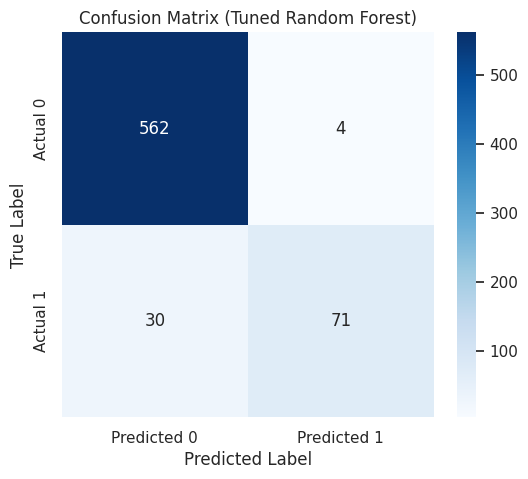

In [80]:
# tune  Random Forest Model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix


# Define the parameter distribution for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],

}

# Initialize RandomizedSearchCV or GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1', n_jobs=-1)

# Fit the randomized search to the data
# rf_grid.fit(X_train, y_train)
rf_grid.fit(X_train_scaled, y_train)

# Get the best estimator from the search
rf_model_tuned = rf_grid.best_estimator_

# Make predictions using the tuned model
y_pred = rf_model_tuned.predict(X_test_scaled)

# Evaluate the tuned model
rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"Tuned Random Forest - Accuracy: {rf_accuracy}")
print(f"Tuned   Random Forest - Recall: {rf_recall}")
print(f"Tuned Random Forest - Precision: {rf_precision}")
print(f"Tuned Random Forest - F1-score: {rf_f1}")

print(classification_report(y_test, y_pred))

# Plot confusion matrix for the tuned model
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (Tuned Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###Tuned Decision Tree

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.79      0.75      0.77       101

    accuracy                           0.93       667
   macro avg       0.87      0.86      0.87       667
weighted avg       0.93      0.93      0.93       667

Accuracy: 0.9325337331334332
Precision: 0.7916666666666666
Recall: 0.7524752475247525
F1 Score: 0.7715736040609137


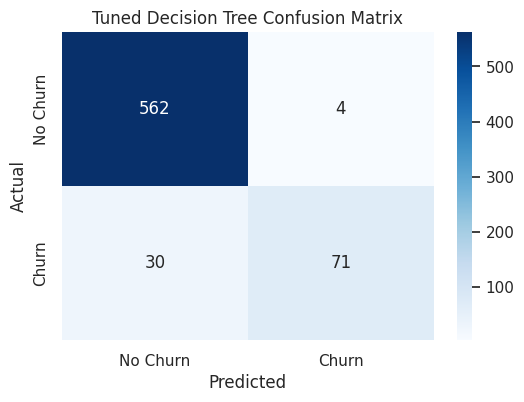

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(X_train_scaled, y_train)

# Print the best parameters and the best score for Decision Tree
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)


# Evaluate the best Decision Tree model on the test set
dt_model = grid_search_dt.best_estimator_
y_pred = dt_model.predict(X_test_scaled)


print("Best Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


# Confusion Matrix Visualization for Tuned Decision Tree
plt.figure(figsize=(6, 4))
conf_matrix_best_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned Decision Tree Confusion Matrix")
plt.show()


In [83]:
print(rf_model.get_params()['min_samples_split'])

2


##Model Evaluation

In [88]:
def evaluate_model(model, X_test, y_test, model_name):
  y_pred = model.predict(X_test_scaled)


  print(f"\n{model_name} Model Evaluation:")
  print(classification_report(y_test, y_pred, zero_division=1))
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
  print(f"Precision: {precision_score(y_test, y_pred, pos_label=1, zero_division=1 ):.4f}")
  print(f"Recall: {recall_score(y_test, y_pred, pos_label=1 ):.4f}")
  print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.4f}")


evaluate_model(logreg_model, X_test, y_test, "Logistic Regression")
evaluate_model(dt_model, X_test, y_test, "Decision Tree")
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(rf_model, X_test, y_test, "Tuned Random Forest")
evaluate_model(knn_model, X_test, y_test, "K-Nearest Neighbors")
evaluate_model(svm_model, X_test, y_test, "Support Vector Machine (SVM)")



Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.59      0.17      0.26       101

    accuracy                           0.86       667
   macro avg       0.73      0.57      0.59       667
weighted avg       0.83      0.86      0.82       667

Accuracy: 0.8561
Precision: 0.5862
Recall: 0.1683
F1 Score: 0.2615

Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.79      0.75      0.77       101

    accuracy                           0.93       667
   macro avg       0.87      0.86      0.87       667
weighted avg       0.93      0.93      0.93       667

Accuracy: 0.9325
Precision: 0.7917
Recall: 0.7525
F1 Score: 0.7716

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       56

## MOdel Evaluation
The Tuned Random Forest was the best performing model  achieving the highest accuracy and F1 Score  indicating superior classification performance. Random Forest models outperformed Decision Trees, highlighting the strength of ensemble learning,svm had the highest showing that it detect more churns while hyperparameter tuning significantly improved the results. Logistic Regression performed reasonably but was outshined by non-linear models. Overall, Tuned Random Forest is the optimal choice.




##Findings

1. Customer services calls are strongly correlated with churn which indicates customers who make more calls to customer service are more likely to leave this suggests dissatisfaction with SyrialTel's support services.

2. call usage has weak correlation with churn this might be as a result of service quality and pricing.

3. All the model had the same recall of 74% which means all the model detected most of the customers who actually churned.

##Recommendation


1. Improve customer support by identifying common customer complaints from high frequently callers.

2. Enhance customer engagement by offering customer support for those making frequent service calls.

3.Handle class imbalance by using techniques like class weight to improve model accuracy since the churned customer are fewer.

4. The best model was Random Forest Model with 94% accuracy and precision of 96%.

5. If the company wants to catch churners they should increase recall to 80-85 or even 90%.